In [20]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import mode

# Load your dataset
data = pd.read_csv('data/train_tfidf_features.csv')

# Exclude the first column and use the second column as the label
X = data.drop(['label', 'id'], axis=1).values  # Convert to NumPy array
y = data['label'].values  # Convert to NumPy array

# List of random seeds, learning rates, and number of estimators
random_seeds = [42, 52, 62]
learning_rates = [0.01, 0.1, 0.5, 1.0]

# Initialize variables to track the best configuration
best_accuracy = 0
best_lr = None
best_n_estimators = None
best_seed = None

# Iterate over each combination of learning rate and number of estimators
for lr in learning_rates:
    test_accuracies = []
    
    for seed in random_seeds:
        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

        # Initialize the base estimator
        base_estimator = DecisionTreeClassifier(max_depth=1)

        # Initialize the AdaBoost classifier
        adaboost = AdaBoostClassifier(estimator=base_estimator, n_estimators=10, learning_rate=lr, random_state=seed)

        # Define the k-fold cross-validator
        kf = KFold(n_splits=5, shuffle=True, random_state=seed)

        # Prepare an array to collect predictions
        all_predictions = np.zeros((X_train.shape[0], kf.get_n_splits()), dtype=int)

        # Perform cross-validation
        for fold_index, (train_index, test_index) in enumerate(kf.split(X_train)):
            X_train_fold, X_val_fold = X_train[train_index], X_train[test_index]
            y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]
            
            # Train the classifier
            adaboost.fit(X_train_fold, y_train_fold)
            
            # Predict on the validation set
            y_pred = adaboost.predict(X_val_fold)
            
            # Store predictions in the appropriate rows
            all_predictions[test_index, fold_index] = y_pred

        # Calculate majority vote for each sample
        majority_vote_predictions_train = mode(all_predictions, axis=1).mode.flatten()

        # Train the classifier on the entire training set
        adaboost.fit(X_train, y_train)

        # Predict on the test set
        y_test_pred = adaboost.predict(X_test)

        # Calculate the accuracy on the test set
        test_accuracy = accuracy_score(y_test, y_test_pred)
        test_accuracies.append(test_accuracy)
        print(f"Test Accuracy for seed {seed}, learning rate {lr}, n_estimators {n_estimators}: {test_accuracy:.2f}")

    # Calculate and print the average accuracy for this learning rate and number of estimators
    average_accuracy = np.mean(test_accuracies)
    print(f"Average Test Accuracy for learning rate {lr} and n_estimators {n_estimators}: {average_accuracy:.2f}")

    # Update best parameters if current average accuracy is better
    if average_accuracy > best_accuracy:
        best_accuracy = average_accuracy
        best_lr = lr
        best_n_estimators = n_estimators
        best_seed = seed

# Print the best configuration
print(f"Best Accuracy: {best_accuracy:.2f}")
print(f"Best Learning Rate: {best_lr}")
print(f"Best Number of Estimators: {best_n_estimators}")
print(f"Best Seed: {best_seed}")

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anacond

Test Accuracy for seed 42, learning rate 0.01, n_estimators 100: 0.65


/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anacond

Test Accuracy for seed 52, learning rate 0.01, n_estimators 100: 0.63


/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anacond

Test Accuracy for seed 62, learning rate 0.01, n_estimators 100: 0.63
Average Test Accuracy for learning rate 0.01 and n_estimators 100: 0.64


/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anacond

Test Accuracy for seed 42, learning rate 0.1, n_estimators 100: 0.65


/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anacond

Test Accuracy for seed 52, learning rate 0.1, n_estimators 100: 0.64


/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anacond

Test Accuracy for seed 62, learning rate 0.1, n_estimators 100: 0.64
Average Test Accuracy for learning rate 0.1 and n_estimators 100: 0.64


/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anacond

Test Accuracy for seed 42, learning rate 0.5, n_estimators 100: 0.67


/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anacond

Test Accuracy for seed 52, learning rate 0.5, n_estimators 100: 0.66


/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anacond

Test Accuracy for seed 62, learning rate 0.5, n_estimators 100: 0.66
Average Test Accuracy for learning rate 0.5 and n_estimators 100: 0.66


/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anacond

Test Accuracy for seed 42, learning rate 1.0, n_estimators 100: 0.68


/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anacond

Test Accuracy for seed 52, learning rate 1.0, n_estimators 100: 0.67


/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/anacond

Test Accuracy for seed 62, learning rate 1.0, n_estimators 100: 0.68
Average Test Accuracy for learning rate 1.0 and n_estimators 100: 0.68
Best Accuracy: 0.68
Best Learning Rate: 1.0
Best Number of Estimators: 100
Best Seed: 62


In [14]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)
y_test_pred_logistic = logistic_model.predict(X_test)
test_accuracy_logistic = (y_test_pred_logistic == y_test).mean()
print(f"Test Accuracy with Logistic Regression: {test_accuracy_logistic:.2f}")

Test Accuracy with Logistic Regression: 1.00


In [7]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import f1_score

# Load your dataset
data = pd.read_csv('data/train_tfidf_features.csv')

# Exclude the first column and use the second column as the label
X = data.drop(['label', 'id'], axis=1).values  # Convert to NumPy array
y = data['label'].values  # Convert to NumPy array

# Define parameter ranges for each batch
boosting_types = ['gbdt', 'dart']
n_estimators_list = [50, 100]
batch_2_num_leaves = [15, 31, 63]
batch_3_max_depth = [10, 20, -1]  # -1 means no limit
batch_3_subsample = [0.8, 0.9, 1.0]
batch_3_colsample_bytree = [0.8, 0.9, 1.0]

# Initialize variables to track the best configuration
best_f1 = 0
best_params = {}

# Store results for each batch
batch_1_results = []
batch_2_results = []
batch_3_results = []

# **Batch 1: Vary boosting_type and n_estimators**
for boosting_type in boosting_types:
    for n_estimators in n_estimators_list:
        test_f1_scores = []

        for seed in [42, 52, 62]:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
            kf = KFold(n_splits=5, shuffle=True, random_state=seed)

            for train_index, val_index in kf.split(X_train):
                X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
                y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

                lgbm = lgb.LGBMClassifier(
                    n_estimators=n_estimators,
                    learning_rate=0.1,
                    boosting_type=boosting_type,
                    num_leaves=31,  # Use a default value for now
                    max_depth=-1,  # Use a default value for now
                    subsample=1.0,  # Use a default value for now
                    colsample_bytree=1.0,  # Use a default value for now
                    random_state=seed
                )

                lgbm.fit(X_train_fold, y_train_fold)
                y_pred = lgbm.predict(X_val_fold)
                test_f1_scores.append(f1_score(y_val_fold, y_pred, average='weighted'))

        average_f1 = np.mean(test_f1_scores)
        batch_1_results.append((boosting_type, n_estimators, average_f1))

        if average_f1 > best_f1:
            best_f1 = average_f1
            best_params = {
                'boosting_type': boosting_type,
                'n_estimators': n_estimators,
                'num_leaves': 31,  # Use default value from Batch 1
                'max_depth': -1,  # Use default value from Batch 1
                'subsample': 1.0,  # Use default value from Batch 1
                'colsample_bytree': 1.0  # Use default value from Batch 1
            }

# Print Batch 1 results
print("\nBatch 1 Results (varying boosting_type and n_estimators):")
for boosting_type, n_estimators, f1 in batch_1_results:
    print(f"Boosting Type: {boosting_type}, Number of Estimators: {n_estimators}, Average F1 Score: {f1:.2f}")

# **Batch 2: Vary num_leaves**
for num_leaves in batch_2_num_leaves:
    test_f1_scores = []

    for seed in [42, 52, 62]:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
        kf = KFold(n_splits=5, shuffle=True, random_state=seed)

        for train_index, val_index in kf.split(X_train):
            X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
            y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

            lgbm = lgb.LGBMClassifier(
                n_estimators=best_params['n_estimators'],
                learning_rate=0.1,
                boosting_type=best_params['boosting_type'],
                num_leaves=num_leaves,
                max_depth=best_params['max_depth'],
                subsample=best_params['subsample'],
                colsample_bytree=best_params['colsample_bytree'],
                random_state=seed
            )

            lgbm.fit(X_train_fold, y_train_fold)
            y_pred = lgbm.predict(X_val_fold)
            test_f1_scores.append(f1_score(y_val_fold, y_pred, average='weighted'))

    average_f1 = np.mean(test_f1_scores)
    batch_2_results.append((num_leaves, average_f1))

    if average_f1 > best_f1:
        best_f1 = average_f1
        best_params['num_leaves'] = num_leaves

# Print Batch 2 results
print("\nBatch 2 Results (varying num_leaves):")
for num_leaves, f1 in batch_2_results:
    print(f"Num Leaves: {num_leaves}, Average F1 Score: {f1:.2f}")

# **Batch 3: Vary max_depth, subsample, and colsample_bytree**
for max_depth in batch_3_max_depth:
    for subsample in batch_3_subsample:
        for colsample_bytree in batch_3_colsample_bytree:
            test_f1_scores = []

            for seed in [42, 52, 62]:
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
                kf = KFold(n_splits=5, shuffle=True, random_state=seed)

                for train_index, val_index in kf.split(X_train):
                    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
                    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

                    lgbm = lgb.LGBMClassifier(
                        n_estimators=best_params['n_estimators'],
                        learning_rate=0.1,
                        boosting_type=best_params['boosting_type'],
                        num_leaves=best_params['num_leaves'],
                        max_depth=max_depth,
                        subsample=subsample,
                        colsample_bytree=colsample_bytree,
                        random_state=seed
                    )

                    lgbm.fit(X_train_fold, y_train_fold)
                    y_pred = lgbm.predict(X_val_fold)
                    test_f1_scores.append(f1_score(y_val_fold, y_pred, average='weighted'))

            average_f1 = np.mean(test_f1_scores)
            batch_3_results.append((max_depth, subsample, colsample_bytree, average_f1))

            if average_f1 > best_f1:
                best_f1 = average_f1
                best_params.update({
                    'max_depth': max_depth,
                    'subsample': subsample,
                    'colsample_bytree': colsample_bytree
                })

# Print Batch 3 results
print("\nBatch 3 Results (varying max_depth, subsample, and colsample_bytree):")
for max_depth, subsample, colsample_bytree, f1 in batch_3_results:
    print(f"Max Depth: {max_depth}, Subsample: {subsample}, Colsample_bytree: {colsample_bytree}, Average F1 Score: {f1:.2f}")

# Print the best configuration
print(f"\nBest F1 Score: {best_f1:.2f}")
print(f"Best Parameters: {best_params}")

[LightGBM] [Info] Number of positive: 4203, number of negative: 6794
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 18899
[LightGBM] [Info] Number of data points in the train set: 10997, number of used features: 814
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382195 -> initscore=-0.480241
[LightGBM] [Info] Start training from score -0.480241
[LightGBM] [Info] Number of positive: 4205, number of negative: 6792
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023340 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18842
[LightGBM] [Info] Number of data points in the train set: 10997, number of used features: 801
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382377 -> initscore=-0.479471
[L

KeyboardInterrupt: 

In [11]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import f1_score

# Load your dataset
data = pd.read_csv('data/train_tfidf_features.csv')

# Exclude the first column and use the second column as the label
X = data.drop(['label', 'id'], axis=1).values  # Convert to NumPy array
y = data['label'].values  # Convert to NumPy array

# List of random seeds, number of estimators, and number of leaves
random_seeds = [42, 52, 62]
n_estimators_list = [50, 100]
num_leaves_list = [15, 31, 63]
boosting_types = ['gbdt', 'dart']

# Initialize variables to track the best configuration
best_f1_score = 0
best_params = {}

# Store results for all configurations
results = []

# Iterate over each combination of boosting type, number of leaves, and number of estimators
for boosting_type in boosting_types:
    for num_leaves in num_leaves_list:
        for n_estimators in n_estimators_list:
            test_f1_scores = []

            for seed in random_seeds:
                # Split data into training and testing sets
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

                # Define the k-fold cross-validator
                kf = KFold(n_splits=5, shuffle=True, random_state=seed)

                # Prepare an array to collect predictions
                all_predictions = np.zeros((X_train.shape[0], kf.get_n_splits()), dtype=int)

                # Perform cross-validation
                for fold_index, (train_index, val_index) in enumerate(kf.split(X_train)):
                    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
                    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

                    # Initialize the LightGBM classifier
                    lgbm = lgb.LGBMClassifier(
                        n_estimators=n_estimators,
                        learning_rate=0.1,
                        boosting_type=boosting_type,
                        num_leaves=num_leaves,
                        random_state=seed
                    )

                    # Train the classifier
                    lgbm.fit(X_train_fold, y_train_fold)

                    # Predict on the validation set
                    y_pred = lgbm.predict(X_val_fold)

                    # Store predictions in the appropriate rows
                    all_predictions[val_index, fold_index] = y_pred

                # Calculate majority vote for each sample
                majority_vote_predictions_train = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=all_predictions)

                # Train the classifier on the entire training set
                lgbm.fit(X_train, y_train)

                # Predict on the test set
                y_test_pred = lgbm.predict(X_test)

                # Calculate the F1 score on the test set
                test_f1_score = f1_score(y_test, y_test_pred, average='macro')
                test_f1_scores.append(test_f1_score)

            # Calculate and store the average F1 score for this combination of parameters
            average_f1_score = np.mean(test_f1_scores)
            results.append((boosting_type, num_leaves, n_estimators, average_f1_score))

            # Update best parameters if current average F1 score is better
            if average_f1_score > best_f1_score:
                best_f1_score = average_f1_score
                best_params = {
                    'boosting_type': boosting_type,
                    'num_leaves': num_leaves,
                    'n_estimators': n_estimators
                }

# Print all results at the end
print("\nAll Results:")
for boosting_type, num_leaves, n_estimators, f1_score in results:
    print(f"Boosting Type: {boosting_type}, Num Leaves: {num_leaves}, Number of Estimators: {n_estimators}, Average F1 Score (Macro): {f1_score:.2f}")

# Print the best configuration
print(f"\nBest F1 Score (Macro): {best_f1_score:.2f}")
print(f"Best Parameters: {best_params}")

[LightGBM] [Info] Number of positive: 4203, number of negative: 6794
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 18899
[LightGBM] [Info] Number of data points in the train set: 10997, number of used features: 814
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382195 -> initscore=-0.480241
[LightGBM] [Info] Start training from score -0.480241
[LightGBM] [Info] Number of positive: 4205, number of negative: 6792
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024135 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18842
[LightGBM] [Info] Number of data points in the train set: 10997, number of used features: 801
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382377 -> initscore=-0.479471
[L

In [13]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import f1_score

# Load your dataset
data = pd.read_csv('data/train_tfidf_features.csv')

# Exclude the first column and use the second column as the label
X = data.drop(['label', 'id'], axis=1).values  # Convert to NumPy array
y = data['label'].values  # Convert to NumPy array

# Fixed parameters
n_estimators = 50
num_leaves = 31

# List of max_depth, subsample, colsample_bytree
max_depth_list = [-1, 10, 20]  # -1 means no limit
subsample_list = [0.8, 0.9, 1.0]
colsample_bytree_list = [0.8, 0.9, 1.0]

# Initialize variables to track the best configuration
best_f1_score = 0
best_params = {}

# Store results for all configurations
results = []

# Iterate over each combination of max_depth, subsample, and colsample_bytree
for max_depth in max_depth_list:
    for subsample in subsample_list:
        for colsample_bytree in colsample_bytree_list:
            test_f1_scores = []

            for seed in [42, 52, 62]:
                # Split data into training and testing sets
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

                # Define the k-fold cross-validator
                kf = KFold(n_splits=5, shuffle=True, random_state=seed)

                # Prepare an array to collect predictions
                all_predictions = np.zeros((X_train.shape[0], kf.get_n_splits()), dtype=int)

                # Perform cross-validation
                for fold_index, (train_index, val_index) in enumerate(kf.split(X_train)):
                    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
                    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

                    # Initialize the LightGBM classifier
                    lgbm = lgb.LGBMClassifier(
                        n_estimators=n_estimators,
                        learning_rate=0.1,
                        boosting_type='gbdt',  # Fixed to 'gbdt'
                        num_leaves=num_leaves,
                        max_depth=max_depth,
                        subsample=subsample,
                        colsample_bytree=colsample_bytree,
                        random_state=seed
                    )

                    # Train the classifier
                    lgbm.fit(X_train_fold, y_train_fold)

                    # Predict on the validation set
                    y_pred = lgbm.predict(X_val_fold)

                    # Store predictions in the appropriate rows
                    all_predictions[val_index, fold_index] = y_pred

                # Calculate majority vote for each sample
                majority_vote_predictions_train = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=all_predictions)

                # Train the classifier on the entire training set
                lgbm.fit(X_train, y_train)

                # Predict on the test set
                y_test_pred = lgbm.predict(X_test)

                # Calculate the F1 score on the test set
                f1 = f1_score(y_test, y_test_pred, average='macro')
                test_f1_scores.append(f1)

            # Calculate and store the average F1 score for this combination of parameters
            average_f1 = np.mean(test_f1_scores)
            results.append((num_leaves, max_depth, subsample, colsample_bytree, average_f1))

            # Update best parameters if current average F1 score is better
            if average_f1 > best_f1_score:
                best_f1_score = average_f1
                best_params = {
                    'num_leaves': num_leaves,
                    'max_depth': max_depth,
                    'subsample': subsample,
                    'colsample_bytree': colsample_bytree
                }

# Print all results at the end
print("\nAll Results:")
for num_leaves, max_depth, subsample, colsample_bytree, f1 in results:
    print(f"Num Leaves: {num_leaves}, Max Depth: {max_depth}, Subsample: {subsample}, Colsample_bytree: {colsample_bytree}, Average F1 Score (Macro): {f1:.2f}")

# Print the best configuration
print(f"\nBest F1 Score (Macro): {best_f1_score:.2f}")
print(f"Best Parameters: {best_params}")

[LightGBM] [Info] Number of positive: 4203, number of negative: 6794
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022081 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18899
[LightGBM] [Info] Number of data points in the train set: 10997, number of used features: 814
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382195 -> initscore=-0.480241
[LightGBM] [Info] Start training from score -0.480241
[LightGBM] [Info] Number of positive: 4205, number of negative: 6792
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010071 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18842
[LightGBM] [Info] Number of data points in the train set: 10997, number of used features: 801
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382377 -> initscore=-0.479471
[LightGBM] [Info] Start training from score -0.479471
[LightGBM] [

In [15]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Load your dataset
data = pd.read_csv('data/train_tfidf_features.csv')

# Exclude the first column and use the second column as the label
X = data.drop(['label', 'id'], axis=1).values  # Convert to NumPy array
y = data['label'].values  # Convert to NumPy array

# Fixed parameters
n_estimators = 50
num_leaves = 31
boosting_type = 'dart'
learning_rate = 0.1

# List of parameters to vary
max_depth_list = [-1, 10, 20]  # -1 means no limit
subsample_list = [0.8, 0.9, 1.0]
colsample_bytree_list = [0.8, 0.9, 1.0]
random_seeds = [42, 52, 62]

# Initialize variables to track the best configuration
best_f1 = 0
best_params = {}

# Store results for all configurations
results = []

# Iterate over each combination of max_depth, subsample, and colsample_bytree
for max_depth in max_depth_list:
    for subsample in subsample_list:
        for colsample_bytree in colsample_bytree_list:
            f1_scores = []

            for seed in random_seeds:
                # Split data into training and testing sets
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

                # Initialize the LightGBM classifier
                lgbm = lgb.LGBMClassifier(
                    n_estimators=n_estimators,
                    learning_rate=learning_rate,
                    boosting_type=boosting_type,
                    num_leaves=num_leaves,
                    max_depth=max_depth,
                    subsample=subsample,
                    colsample_bytree=colsample_bytree,
                    random_state=seed
                )

                # Train the classifier
                lgbm.fit(X_train, y_train)

                # Predict on the test set
                y_test_pred = lgbm.predict(X_test)

                # Calculate the F1 score on the test set (macro)
                test_f1 = f1_score(y_test, y_test_pred, average='macro')
                f1_scores.append(test_f1)

            # Calculate and store the average F1 score for this combination of parameters
            average_f1 = np.mean(f1_scores)
            results.append((max_depth, subsample, colsample_bytree, average_f1))

            # Update best parameters if current average F1 score is better
            if average_f1 > best_f1:
                best_f1 = average_f1
                best_params = {
                    'max_depth': max_depth,
                    'subsample': subsample,
                    'colsample_bytree': colsample_bytree
                }

# Print all results at the end
print("\nAll Results:")
for max_depth, subsample, colsample_bytree, f1 in results:
    print(f"Max Depth: {max_depth}, Subsample: {subsample}, Colsample_bytree: {colsample_bytree}, Average F1 Score (Macro): {f1:.2f}")

# Print the best configuration
print(f"\nBest F1 Score (Macro): {best_f1:.2f}")
print(f"Best Parameters: {best_params}")

[LightGBM] [Info] Number of positive: 5267, number of negative: 8480
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24778
[LightGBM] [Info] Number of data points in the train set: 13747, number of used features: 1009
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383138 -> initscore=-0.476250
[LightGBM] [Info] Start training from score -0.476250
[LightGBM] [Info] Number of positive: 5221, number of negative: 8526
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.025370 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 24702
[LightGBM] [Info] Number of data points in the train set: 13747, number of used features: 996
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.379792 -> initscore=-0.490431
[

In [16]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import f1_score

# Load your dataset
data = pd.read_csv('data/train_tfidf_features.csv')

# Exclude the first column and use the second column as the label
X = data.drop(['label', 'id'], axis=1).values  # Convert to NumPy array
y = data['label'].values  # Convert to NumPy array

# Fixed parameters
subsample = 0.8
colsample_bytree = 0.8

# List of parameters to vary
n_estimators_list = [50, 100]
num_leaves_list = [15, 31, 63]
max_depth_list = [-1, 10, 20]  # -1 means no limit
boosting_types = ['gbdt', 'dart']

# Initialize variables to track the best configuration
best_f1_score = 0
best_params = {}

# Store results for all configurations
results = []

# Iterate over each boosting type
for boosting_type in boosting_types:
    # Iterate over each combination of num_leaves, n_estimators, and max_depth
    for num_leaves in num_leaves_list:
        for n_estimators in n_estimators_list:
            for max_depth in max_depth_list:
                test_f1_scores = []

                for seed in [42, 52, 62]:
                    # Split data into training and testing sets
                    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

                    # Define the k-fold cross-validator
                    kf = KFold(n_splits=5, shuffle=True, random_state=seed)

                    # Prepare an array to collect predictions
                    all_predictions = np.zeros((X_train.shape[0], kf.get_n_splits()), dtype=int)

                    # Perform cross-validation
                    for fold_index, (train_index, val_index) in enumerate(kf.split(X_train)):
                        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
                        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

                        # Initialize the LightGBM classifier
                        lgbm = lgb.LGBMClassifier(
                            n_estimators=n_estimators,
                            learning_rate=0.1,
                            boosting_type=boosting_type,
                            num_leaves=num_leaves,
                            max_depth=max_depth,
                            subsample=subsample,
                            colsample_bytree=colsample_bytree,
                            random_state=seed
                        )

                        # Train the classifier
                        lgbm.fit(X_train_fold, y_train_fold)

                        # Predict on the validation set
                        y_pred = lgbm.predict(X_val_fold)

                        # Store predictions in the appropriate rows
                        all_predictions[val_index, fold_index] = y_pred

                    # Calculate majority vote for each sample
                    majority_vote_predictions_train = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=all_predictions)

                    # Train the classifier on the entire training set
                    lgbm.fit(X_train, y_train)

                    # Predict on the test set
                    y_test_pred = lgbm.predict(X_test)

                    # Calculate the F1 score on the test set
                    f1 = f1_score(y_test, y_test_pred, average='macro')
                    test_f1_scores.append(f1)

                # Calculate and store the average F1 score for this combination of parameters
                average_f1 = np.mean(test_f1_scores)
                results.append((boosting_type, num_leaves, n_estimators, max_depth, average_f1))

                # Update best parameters if current average F1 score is better
                if average_f1 > best_f1_score:
                    best_f1_score = average_f1
                    best_params = {
                        'boosting_type': boosting_type,
                        'num_leaves': num_leaves,
                        'n_estimators': n_estimators,
                        'max_depth': max_depth
                    }

# Print all results at the end
print("\nAll Results:")
for boosting_type, num_leaves, n_estimators, max_depth, f1 in results:
    print(f"Boosting Type: {boosting_type}, Num Leaves: {num_leaves}, Number of Estimators: {n_estimators}, Max Depth: {max_depth}, Average F1 Score (Macro): {f1:.2f}")

# Print the best configuration
print(f"\nBest F1 Score (Macro): {best_f1_score:.2f}")
print(f"Best Parameters: {best_params}")

[LightGBM] [Info] Number of positive: 4203, number of negative: 6794
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024462 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 18899
[LightGBM] [Info] Number of data points in the train set: 10997, number of used features: 814
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382195 -> initscore=-0.480241
[LightGBM] [Info] Start training from score -0.480241
[LightGBM] [Info] Number of positive: 4205, number of negative: 6792
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019477 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18842
[LightGBM] [Info] Number of data points in the train set: 10997, number of used features: 801
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382377 -> initscore=-0.479471
[L

[LightGBM] [Info] Number of positive: 4203, number of negative: 6794
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 18899
[LightGBM] [Info] Number of data points in the train set: 10997, number of used features: 814
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382195 -> initscore=-0.480241
[LightGBM] [Info] Start training from score -0.480241
[LightGBM] [Info] Number of positive: 4205, number of negative: 6792
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009828 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18842
[LightGBM] [Info] Number of data points in the train set: 10997, number of used features: 801
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382377 -> initscore=-0.479471
[L

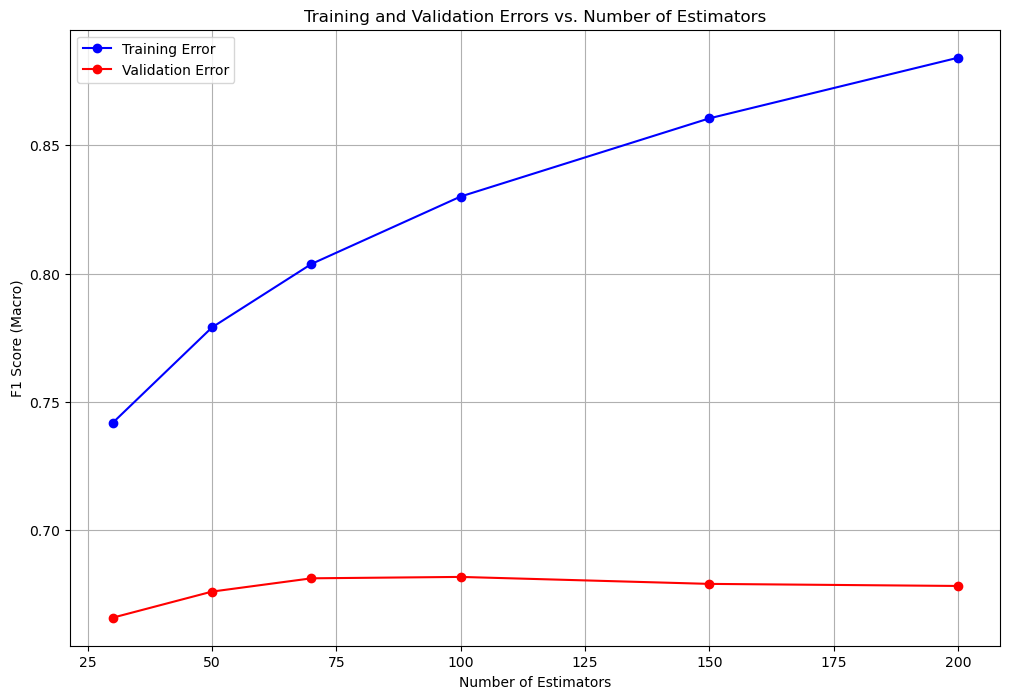


Best F1 Score (Macro) and Parameters:
Best Number of Estimators: 100
Training Error: 0.83
Validation Error: 0.68


In [19]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('data/train_tfidf_features.csv')

# Exclude the first column and use the second column as the label
X = data.drop(['label', 'id'], axis=1).values  # Convert to NumPy array
y = data['label'].values  # Convert to NumPy array

# Fixed parameters
boosting_type = 'gbdt'
num_leaves = 63
max_depth = -1
subsample = 0.8
colsample_bytree = 0.8

# List of parameters to vary
n_estimators_list = [30, 50, 70, 100, 150, 200]  # Expanded range of estimators

# Initialize variables to track results
results = []

# Iterate over each number of estimators
for n_estimators in n_estimators_list:
    training_errors = []
    validation_errors = []

    for seed in [42, 52, 62]:
        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

        # Define the k-fold cross-validator
        kf = KFold(n_splits=5, shuffle=True, random_state=seed)

        # Perform cross-validation
        fold_train_errors = []
        fold_val_errors = []

        for train_index, val_index in kf.split(X_train):
            X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
            y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

            # Initialize the LightGBM classifier
            lgbm = lgb.LGBMClassifier(
                n_estimators=n_estimators,
                learning_rate=0.1,
                boosting_type=boosting_type,
                num_leaves=num_leaves,
                max_depth=max_depth,
                subsample=subsample,
                colsample_bytree=colsample_bytree,
                random_state=seed
            )

            # Train the classifier
            lgbm.fit(X_train_fold, y_train_fold, eval_set=[(X_val_fold, y_val_fold)], eval_metric='logloss')

            # Predict on the training set
            y_train_pred = lgbm.predict(X_train_fold)
            train_f1 = f1_score(y_train_fold, y_train_pred, average='macro')
            fold_train_errors.append(train_f1)

            # Predict on the validation set
            y_val_pred = lgbm.predict(X_val_fold)
            val_f1 = f1_score(y_val_fold, y_val_pred, average='macro')
            fold_val_errors.append(val_f1)

        # Calculate mean errors for this fold
        training_errors.append(np.mean(fold_train_errors))
        validation_errors.append(np.mean(fold_val_errors))

    # Calculate and store the average errors for this number of estimators
    avg_train_error = np.mean(training_errors)
    avg_val_error = np.mean(validation_errors)
    results.append((n_estimators, avg_train_error, avg_val_error))

# Plot training and validation errors against the number of estimators
n_estimators_list, train_errors, val_errors = zip(*results)

plt.figure(figsize=(12, 8))
plt.plot(n_estimators_list, train_errors, marker='o', linestyle='-', color='blue', label='Training Error')
plt.plot(n_estimators_list, val_errors, marker='o', linestyle='-', color='red', label='Validation Error')
plt.xlabel('Number of Estimators')
plt.ylabel('F1 Score (Macro)')
plt.title('Training and Validation Errors vs. Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()

# Print the best configuration
best_idx = np.argmax(val_errors)
print(f"\nBest F1 Score (Macro) and Parameters:")
print(f"Best Number of Estimators: {n_estimators_list[best_idx]}")
print(f"Training Error: {train_errors[best_idx]:.2f}")
print(f"Validation Error: {val_errors[best_idx]:.2f}")

[LightGBM] [Info] Number of positive: 4203, number of negative: 6794
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022228 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 18899
[LightGBM] [Info] Number of data points in the train set: 10997, number of used features: 814
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382195 -> initscore=-0.480241
[LightGBM] [Info] Start training from score -0.480241
[LightGBM] [Info] Number of positive: 4205, number of negative: 6792
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013470 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 18842
[LightGBM] [Info] Number of data points in the train set: 10997, number of used features: 801
[LightGBM] [Info] 

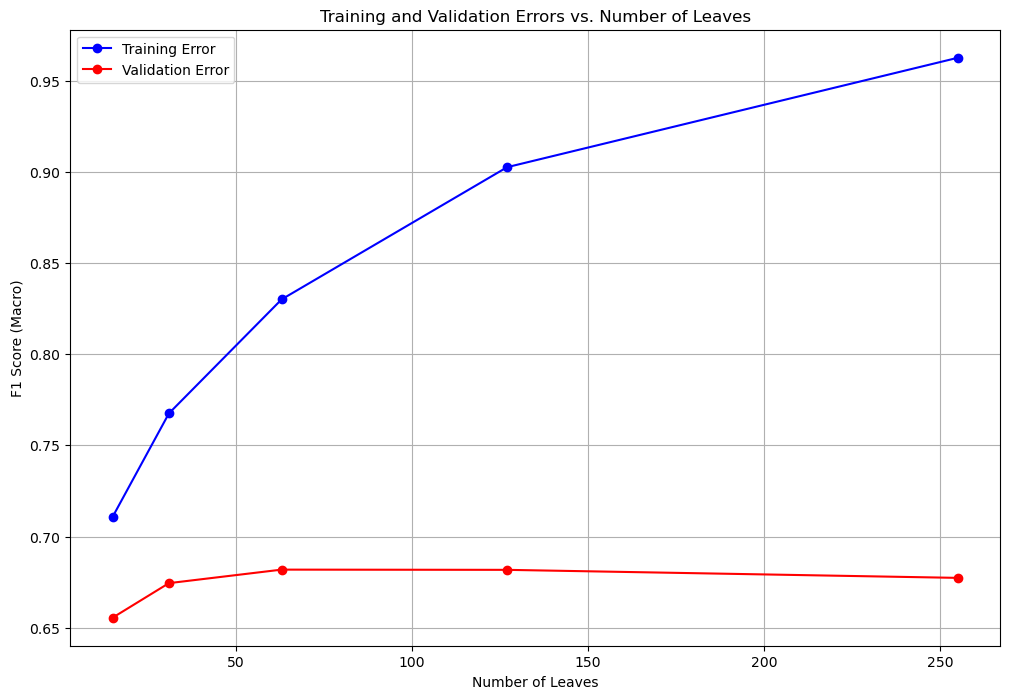


Best F1 Score (Macro) and Parameters:
Best Number of Leaves: 63
Training Error: 0.83
Validation Error: 0.68


In [20]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('data/train_tfidf_features.csv')
X = data.drop(['label', 'id'], axis=1).values
y = data['label'].values

# Fixed parameters
boosting_type = 'gbdt'
n_estimators = 100  # Fixed number of estimators
max_depth = -1
subsample = 0.8
colsample_bytree = 0.8

# List of num_leaves to vary
num_leaves_list = [15, 31, 63, 127, 255]  # Expanded range of leaves

# Initialize variables to track results
results = []

# Iterate over each number of leaves
for num_leaves in num_leaves_list:
    training_errors = []
    validation_errors = []

    for seed in [42, 52, 62]:
        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

        # Define the k-fold cross-validator
        kf = KFold(n_splits=5, shuffle=True, random_state=seed)

        # Perform cross-validation
        fold_train_errors = []
        fold_val_errors = []

        for train_index, val_index in kf.split(X_train):
            X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
            y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

            # Initialize the LightGBM classifier
            lgbm = lgb.LGBMClassifier(
                n_estimators=n_estimators,
                learning_rate=0.1,
                boosting_type=boosting_type,
                num_leaves=num_leaves,
                max_depth=max_depth,
                subsample=subsample,
                colsample_bytree=colsample_bytree,
                random_state=seed
            )

            # Train the classifier
            lgbm.fit(X_train_fold, y_train_fold, eval_set=[(X_val_fold, y_val_fold)], eval_metric='logloss')

            # Predict on the training set
            y_train_pred = lgbm.predict(X_train_fold)
            train_f1 = f1_score(y_train_fold, y_train_pred, average='macro')
            fold_train_errors.append(train_f1)

            # Predict on the validation set
            y_val_pred = lgbm.predict(X_val_fold)
            val_f1 = f1_score(y_val_fold, y_val_pred, average='macro')
            fold_val_errors.append(val_f1)

        # Calculate mean errors for this fold
        training_errors.append(np.mean(fold_train_errors))
        validation_errors.append(np.mean(fold_val_errors))

    # Calculate and store the average errors for this number of leaves
    avg_train_error = np.mean(training_errors)
    avg_val_error = np.mean(validation_errors)
    results.append((num_leaves, avg_train_error, avg_val_error))

# Plot training and validation errors against the number of leaves
num_leaves_list, train_errors, val_errors = zip(*results)

plt.figure(figsize=(12, 8))
plt.plot(num_leaves_list, train_errors, marker='o', linestyle='-', color='blue', label='Training Error')
plt.plot(num_leaves_list, val_errors, marker='o', linestyle='-', color='red', label='Validation Error')
plt.xlabel('Number of Leaves')
plt.ylabel('F1 Score (Macro)')
plt.title('Training and Validation Errors vs. Number of Leaves')
plt.legend()
plt.grid(True)
plt.show()

# Print the best configuration
best_idx = np.argmax(val_errors)
print(f"\nBest F1 Score (Macro) and Parameters:")
print(f"Best Number of Leaves: {num_leaves_list[best_idx]}")
print(f"Training Error: {train_errors[best_idx]:.2f}")
print(f"Validation Error: {val_errors[best_idx]:.2f}")

[LightGBM] [Info] Number of positive: 4203, number of negative: 6794
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 18899
[LightGBM] [Info] Number of data points in the train set: 10997, number of used features: 814
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382195 -> initscore=-0.480241
[LightGBM] [Info] Start training from score -0.480241
[LightGBM] [Info] Number of positive: 4205, number of negative: 6792
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016972 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18842
[LightGBM] [Info] Number of data points in the train set: 10997, number of used features: 801
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382377 -> initscore=-0.479471
[L

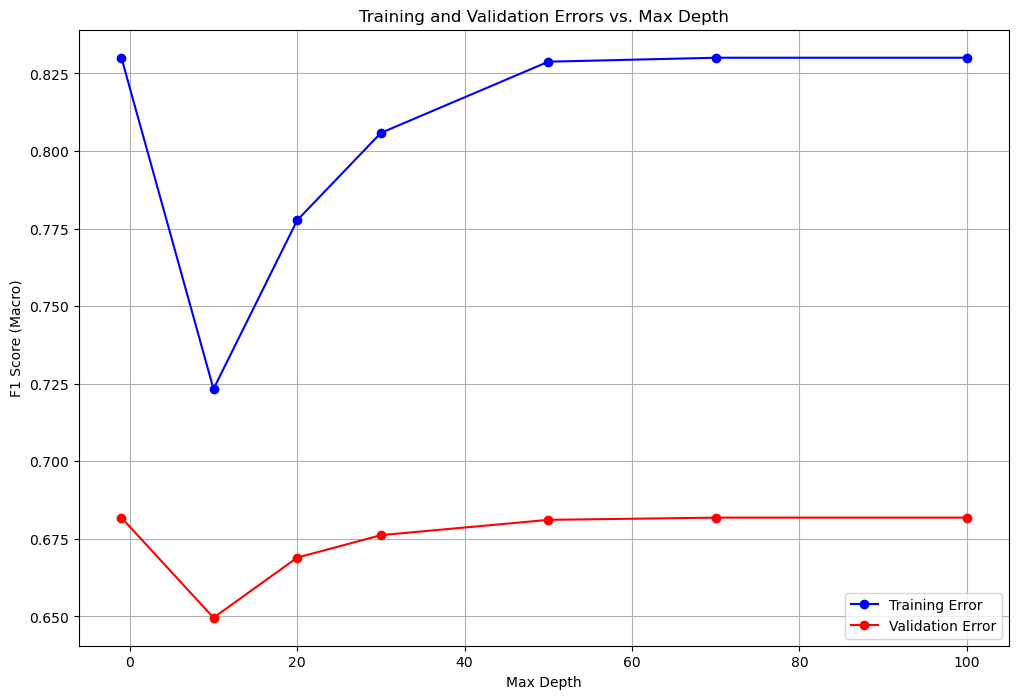


Best F1 Score (Macro) and Parameters:
Best Max Depth: -1
Training Error: 0.83
Validation Error: 0.68


In [22]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Load dataset
data = pd.read_csv('data/train_tfidf_features.csv')
X = data.drop(['label', 'id'], axis=1).values
y = data['label'].values

# Fixed parameters
boosting_type = 'gbdt'
num_leaves = 63  # Fixed number of leaves
max_depth = 30  # Fixed max depth
n_estimators = 100
learning_rate = 0.1
subsample = 0.8
colsample_bytree = 0.8

# Seed for reproducibility
seed = 42

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Initialize the LightGBM classifier
lgbm = lgb.LGBMClassifier(
    n_estimators=n_estimators,
    learning_rate=learning_rate,
    boosting_type=boosting_type,
    num_leaves=num_leaves,
    max_depth=max_depth,
    subsample=subsample,
    colsample_bytree=colsample_bytree,
    random_state=seed
)

# Train the classifier
lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='logloss')

# Predict on the test set
y_test_pred = lgbm.predict(X_test)
test_f1 = f1_score(y_test, y_test_pred, average='macro')

# Print the F1 score on the test set
print(f"F1 Score (Macro) on Test Set: {test_f1:.2f}")

In [6]:
import numpy as np
import pandas as pd
import lightgbm as lgb

# Load the training dataset
train_data = pd.read_csv('data/train_tfidf_features.csv')
X_train = train_data.drop(['label', 'id'], axis=1).values
y_train = train_data['label'].values

# Load the prediction dataset
predict_data = pd.read_csv('data/test_tfidf_features.csv')  # Replace with your prediction dataset path
X_predict = predict_data.drop(['id'], axis=1).values  # Drop only the 'id' column if it exists
ids = predict_data['id'].values  # Extract the 'id' column

# Fixed parameters
boosting_type = 'gbdt'
num_leaves = 63  # Fixed number of leaves
max_depth = 30  # Fixed max depth
n_estimators = 100
learning_rate = 0.1
subsample = 0.8
colsample_bytree = 0.8

# Seed for reproducibility
seed = 42

# Initialize the LightGBM classifier
lgbm = lgb.LGBMClassifier(
    n_estimators=n_estimators,
    learning_rate=learning_rate,
    boosting_type=boosting_type,
    num_leaves=num_leaves,
    max_depth=max_depth,
    subsample=subsample,
    colsample_bytree=colsample_bytree,
    random_state=seed
)

# Train the classifier on the training dataset
lgbm.fit(X_train, y_train)

# Predict on the new dataset
predictions = lgbm.predict(X_predict)

# Print the array of predictions
print("Predictions:")
print(predictions)

# Create a DataFrame with 'id' and 'label' columns
predictions_df = pd.DataFrame({'id': ids, 'label': predictions})

# Display the first few rows of the predictions
print(predictions_df.head())

# Save predictions to a CSV file
predictions_df.to_csv('predictionspca.csv', index=False)

[LightGBM] [Info] Number of positive: 6551, number of negative: 10633
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.041912 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 31959
[LightGBM] [Info] Number of data points in the train set: 17184, number of used features: 1230
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381227 -> initscore=-0.484345
[LightGBM] [Info] Start training from score -0.484345
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

ValueError: Per-column arrays must each be 1-dimensional